##%% md
### Caricamento del testo dal file e divisione in frasi
Come prima cosa leggiamo il testo dal file. Successivamente viene chiamata la funzione *.lower()* sulle frasi per renderle minuscole, togliamo gli spazi vuoti con la funzione *.strip()* e rimuoviamo la punteggiatura grazie all'oggetto *translator*. Infine popoliamo un vettore con le frasi "tradotte" e uno con le frasi originali.

In [14]:
import string
f = open(f"./text1.txt", "r")
translator = str.maketrans('', '', string.punctuation)
sentences_translated = []
sentences = []
for lines in f.readlines():
    sentences += [line.strip() for line in lines.split('.')]
    sentences_translated += [line.lower().strip().translate(translator) for line in lines.split('.')]

real_sentences = []
for sentence in sentences:
    if len(sentence.split(' ')) > 1:
        real_sentences.append(sentence)

clean_sentences = []
for sentence in sentences_translated:
    if len(sentence.split(' ')) > 1:
        clean_sentences.append(sentence)
print("Estratto di real_sentences (prime 10 frasi):\n", real_sentences[0:10], "\n")
print("Estratto di clean_sentences (prime 10 frasi):\n", clean_sentences[0:10])

Estratto di real_sentences (prime 10 frasi):
 ["Philosophy ('love of wisdom', in Ancient Greek) is a systematic study of general and fundamental questions concerning topics like existence, reason, knowledge, value, mind, and language", 'It is a rational and critical inquiry that reflects on its own methods and assumptions', 'Historically, many of the individual sciences, such as physics and psychology, formed part of philosophy', 'However, they are considered separate academic disciplines in the modern sense of the term', 'Influential traditions in the history of philosophy include Western, Arabic–Persian, Indian, and Chinese philosophy', 'Western philosophy originated in Ancient Greece and covers a wide area of philosophical subfields', 'A central topic in Arabic–Persian philosophy is the relation between reason and revelation', 'Indian philosophy combines the spiritual problem of how to reach enlightenment with the exploration of the nature of reality and the ways of arriving at know

### Creazione dei blocchi
Creiamo i blocchi con una dimensione definita a priori e li riempiamo con le frasi ricavate dalla lettura del file.
Nel caso in cui l'ultimo blocco non venga completamente riempito, andiamo ad aggiungere tente frasi vuote ('') quante sono quelle che mancano per completare il blocco.

In [15]:
block_size = 4
blocks = []
i = 0
while i < len(clean_sentences):
    blocks.append(clean_sentences[i:i + block_size])
    i += block_size

length = len(blocks[-1])
if length < block_size:
    j = length - 1
    while j < block_size - 1:
        blocks[-1].append('')
        j += 1

print("Estratto di blocks (primi 10 blocchi)")
for n in range(10):
    print(f'{n} blocco: {blocks[n]}')
        

Estratto di blocks (primi 10 blocchi)
0 blocco: ['philosophy love of wisdom in ancient greek is a systematic study of general and fundamental questions concerning topics like existence reason knowledge value mind and language', 'it is a rational and critical inquiry that reflects on its own methods and assumptions', 'historically many of the individual sciences such as physics and psychology formed part of philosophy', 'however they are considered separate academic disciplines in the modern sense of the term']
1 blocco: ['influential traditions in the history of philosophy include western arabic–persian indian and chinese philosophy', 'western philosophy originated in ancient greece and covers a wide area of philosophical subfields', 'a central topic in arabic–persian philosophy is the relation between reason and revelation', 'indian philosophy combines the spiritual problem of how to reach enlightenment with the exploration of the nature of reality and the ways of arriving at knowledg

### Inizializziamo il vettore che conterrà i valori di similarità tra i blocchi in cui è stato diviso il testo. I valori contenuti in questo vettore verrano visualizzati sul grafico di output.

In [16]:
if len(clean_sentences) % block_size != 0:
    plot = [0.0] * (int((len(clean_sentences) / block_size)))
else:
    plot = [0.0] * (int((len(clean_sentences) / block_size)) - 1)

print(f'Vettore di plot, di lunghezza {len(plot)} inizializzato a 0: \n {plot}')

Vettore di plot, di lunghezza 37 inizializzato a 0: 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Calcolo della cohesion tra due blocchi adiacenti
Per calcolare la similarità tra due blocchi abbiamo utilizzato la cosine similarity. Come prima cosa creiamo le rappresentazioni vettoriali per i due blocchi adiacenti che stiamo considerando. I vettori che rappresentano i blocchi hanno lunghezza pari al vocabolario (ovvero il numero di parole utilizzate nei due blocchi senza considerare le stopwords) e in ogni posizione sarà presente la frequenza della parola *i* nel blocco di riferimento.
Infine si calcola la cohesion utilizzando la formula della cosine similarity sui due vettori calcolati precedentemente.

In [19]:
import math
from nltk.corpus import stopwords
stopword = stopwords.words('english')
for i in range(len(blocks) - 1):
    block1 = blocks[i]
    block2 = blocks[i + 1]
    word_union = []
    for sentence in block1:
        for word in sentence.split(' '):
            if word not in word_union and word not in stopword:
                word_union.append(word)
    for sentence in block2:
        for word in sentence.split(' '):
            if word not in word_union and word not in stopword:
                word_union.append(word)
    vector1 = [0] * len(word_union)
    vector2 = [0] * len(word_union)
    for sentence in block1:
        for word in sentence.split(' '):
            if word in word_union:
                vector1[word_union.index(word)] += 1
    for sentence in block2:
        for word in sentence.split(' '):
            if word in word_union:
                vector2[word_union.index(word)] += 1
    numerator = 0
    sum1 = 0
    sum2 = 0
    for k in range(len(vector1)):
        numerator += vector1[k] * vector2[k]
        sum1 += (vector1[k] * vector1[k])
        sum2 += (vector2[k] * vector2[k])

    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    plot[i] = numerator / denominator

    print(f'Vector reppresenting block[{i}]\nvector1:{vector1}')
    print(f'Vector reppresenting block[{i + 1}]\nvector2:{vector2}')
    print(f'Cohesion tra vector1 e vector2: {plot[i]}')
    print('--------------------------------------------------------')

Vector reppresenting block[0]
vector1:[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Vector reppresenting block[1]
vector2:[5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cohesion tra vector1 e vector2: 0.24123762618319178
--------------------------------------------------------
Vector reppresenting block[1]
vector1:[1, 1, 1, 5, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Vector reppresenting block[2]
vector2:[0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 

### Cattura dei minimi
Grazie alla libreria *scipy* prendiamo tutti i minimi della funzione e li analizziamo andando a catturare solamente quelli che rispettano una certa soglia. In particolare, si calcola un primo delta tra il minimo e il suo valore precedente e un secondo delta tra il valore successivo e il minimo. Successivamente si prende il minimo se ha almeno uno dei due delta maggiore della soglia impostata.

In [33]:
import numpy as np
from scipy.signal import argrelextrema
minimums = argrelextrema(np.array(plot), np.less)[0].tolist()
threshold = 0.166
print(f'Minimus: {minimums}')
print('Threshold scelto:', threshold)
real_minimums = []
for minimum in minimums:
    min_value = plot[minimum]
    prev_value = None
    succ_value = None
    if minimum - 1 >= 0:
        prev_value = plot[minimum - 1]
    if minimum + 1 < len(plot):
        succ_value = plot[minimum + 1]

    if prev_value is not None:
        print(f"Delta in {minimum} between prev_value and min_value is:", (prev_value - min_value))
    if succ_value is not None:
        print(f"Delta in {minimum} between succ_value and min_value is: ", (succ_value - min_value))

    if prev_value is not None and (prev_value - min_value) > threshold:
        print(f'{minimum} is a minimum where a segment should be')
        real_minimums.append(minimum)
    elif succ_value is not None and (succ_value - min_value) > threshold:
        print(f'{minimum} is a minimum where a segment should be')
        real_minimums.append(minimum)

Minimus: [4, 7, 12, 16, 18, 22, 26, 30, 34]
Threshold scelto: 0.166
Delta in 4 between prev_value and min_value is: 0.08668614829770402
Delta in 4 between succ_value and min_value is:  0.10076669214392492
Delta in 7 between prev_value and min_value is: 0.02894051430587194
Delta in 7 between succ_value and min_value is:  0.011244786016079866
Delta in 12 between prev_value and min_value is: 0.05108748287913834
Delta in 12 between succ_value and min_value is:  0.008067738849569989
Delta in 16 between prev_value and min_value is: 0.0263492593021665
Delta in 16 between succ_value and min_value is:  0.16974997094559663
16 is a minimum where a segment should be
Delta in 18 between prev_value and min_value is: 0.07087280470485091
Delta in 18 between succ_value and min_value is:  0.13308094235922122
Delta in 22 between prev_value and min_value is: 0.015296413181993984
Delta in 22 between succ_value and min_value is:  0.1637741792548063
Delta in 26 between prev_value and min_value is: 0.21785510

### Divisione del testo in segmenti
In questa fase creiamo il vettore *positions* che contiene gli indici che delimitano i segmenti del testo calcolati con i minimi. Successivamente si divide il testo in segmenti seguendo le posizioni contenute in *positions*.

In [27]:
segments = []
positions = [0]
for minimum in real_minimums:
    pos = (block_size * minimum) + block_size
    positions.append(pos)
if len(real_sentences) not in positions:
    positions.append(len(real_sentences))

for j in range(len(positions) - 1):
    segments.append(real_sentences[positions[j]:positions[j + 1]])
print("Positions: ", positions)
print("Segments: ")
for n in range(len(segments)):
    print(f'segmento {n}: {segments[n]}')
    print('--------------------------------------------------------')

Positions:  [0, 68, 108, 140, 150]
Segments: 
segmento 0: ["Philosophy ('love of wisdom', in Ancient Greek) is a systematic study of general and fundamental questions concerning topics like existence, reason, knowledge, value, mind, and language", 'It is a rational and critical inquiry that reflects on its own methods and assumptions', 'Historically, many of the individual sciences, such as physics and psychology, formed part of philosophy', 'However, they are considered separate academic disciplines in the modern sense of the term', 'Influential traditions in the history of philosophy include Western, Arabic–Persian, Indian, and Chinese philosophy', 'Western philosophy originated in Ancient Greece and covers a wide area of philosophical subfields', 'A central topic in Arabic–Persian philosophy is the relation between reason and revelation', 'Indian philosophy combines the spiritual problem of how to reach enlightenment with the exploration of the nature of reality and the ways of arri

### Costruzione del grafico
Infine costruiamo un grafico che rappresenterà la divisione del testo, mostrando i punti dove vengono fatte le divisioni (cioè i minimi della funzione che viene disegnata). 

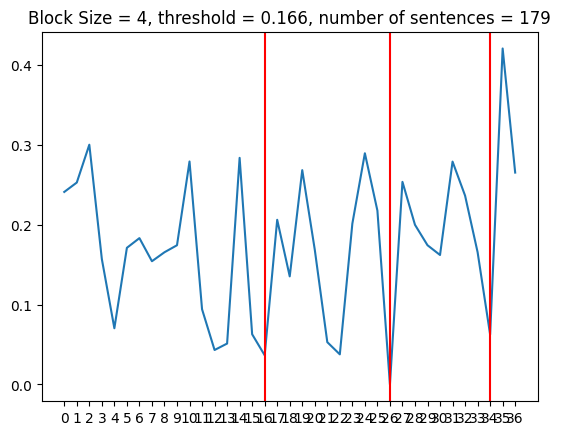

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(len(plot))
plt.plot(x, plot)
plt.xticks(x)
plt.title(f"Block Size = {block_size}, threshold = {threshold}, number of sentences = {len(sentences)}")
for minimum in real_minimums:
    plt.axvline(x=minimum, color='r')
plt.savefig(f"text1_{block_size}_plot.png")